## Description of Data
The data consist of two information, the test data and the information data

Test data contains result from the exercise such as: HR, Speed, RR etc

Info data contains personal information about the individual such as Age, Weight, Height

## Definition of Terms
HR = Heart Rate

Speed = Speed rate (km/hr)

VO2 = Volume of Oxygen consumed

VCO2 = Volume of Carbon di oxide released

RR = Respiratory Rate (Number of breath per min)

VE = Ventilation Evaluation (Volume of air breath in and out of the lungs in a given period of time)

## Import neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.neural_network import MLPRegressor

import math
from scipy.stats import norm, linregress
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from math import sqrt
from itertools import combinations
import sympy as sp

import warnings
warnings.filterwarnings('ignore')

## Read and Understand the dataset

In [2]:
# Read the data
test_df = pd.read_csv('test_measure.csv')

# Print the shape and the first 5 rows of the table
print(test_df.shape)
test_df.head()

(575087, 9)


,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28,14.6,2_1,2


In [3]:
# Output the distinct number of ID attribute
test_df.ID.nunique()

857

In [4]:
# Output the distinct number of ID_test attribute
test_df.ID_test.nunique()

992

In [5]:
# View the number of null and data type of the dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575087 entries, 0 to 575086
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   time     575087 non-null  int64  
 1   Speed    575087 non-null  float64
 2   HR       574106 non-null  float64
 3   VO2      570216 non-null  float64
 4   VCO2     570216 non-null  float64
 5   RR       575087 non-null  int64  
 6   VE       575087 non-null  float64
 7   ID_test  575087 non-null  object 
 8   ID       575087 non-null  int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 39.5+ MB


In [6]:
# Check for missing value
test_df.isna().sum()

time          0
Speed         0
HR          981
VO2        4871
VCO2       4871
RR            0
VE            0
ID_test       0
ID            0
dtype: int64

## Data Cleaning and pre-proccessing

### Drop VO2 and VCO2 from the data

In [7]:
test_df.drop(columns = ['VO2','VCO2'], inplace = True)

### Replace missing values in HR with the median HR of each ID_test group

In [8]:
# Calculate average HR for each 'ID_test' group
avg_hr_by_id_test = test_df.groupby('ID_test')['HR'].transform('median')

# Fill missing values in 'HR' column with the corresponding median HR for each 'ID_test' group
test_df['HR'] = test_df['HR'].fillna(avg_hr_by_id_test)

In [9]:
# Confirm the missing values have been removed
test_df.isna().sum()

time       0
Speed      0
HR         0
RR         0
VE         0
ID_test    0
ID         0
dtype: int64

In [10]:
# Check the statistics of the numerical variables
test_df.describe()

,time,Speed,HR,RR,VE,ID
count,575087.000000,575087.000000,575087.000000,575087.000000,575087.000000,575087.000000
mean,628.126172,9.607958,146.944044,36.491513,69.304931,425.424579
std,325.588844,4.520384,32.183797,12.177244,33.558583,245.443493
min,0.000000,0.000000,0.000000,2.000000,1.800000,1.000000
25%,375.000000,5.000000,123.000000,27.000000,42.200000,208.000000
50%,646.000000,9.000000,153.000000,36.000000,66.300000,431.000000
75%,875.000000,13.400000,174.000000,44.000000,92.000000,630.000000
max,1712.000000,23.100000,226.000000,113.000000,207.100000,857.000000


### Remove Speed limit <=5 and HR < 60 from the dataset

In [11]:
# Filtering rows where 'Speed' is greater than 5 or 'HR' is greater than or equal to 60
test_data = test_df[(test_df['Speed'] > 5)]

# Checking the shape of the filtered dataframe
print(test_data.shape)

(391502, 7)


In [12]:
# Filtering rows where 'Speed' is greater than 5 or 'HR' is greater than or equal to 60
test_df = test_data[(test_data['HR'] >=60)]

# Checking the shape of the filtered dataframe
print(test_df.shape)

(391484, 7)


### Check Individuals with multiple exercise test

In [13]:
# Group the data based on the ID attribute and find the unique count of the ID_test
unique_entries = test_df.groupby('ID')['ID_test'].nunique()

# Filter out ID_test > 2, print out the shape and the ID's with multiple exercise test
id_test_2 = unique_entries[unique_entries > 2]
print(id_test_2.shape)
id_test_2

(16,)


ID
15     3
58     3
99     3
308    3
351    3
417    3
492    4
499    3
502    3
506    5
511    3
534    3
542    3
552    3
553    3
856    3
Name: ID_test, dtype: int64

### Scatterplot of some ID test with their respective slope and intercept

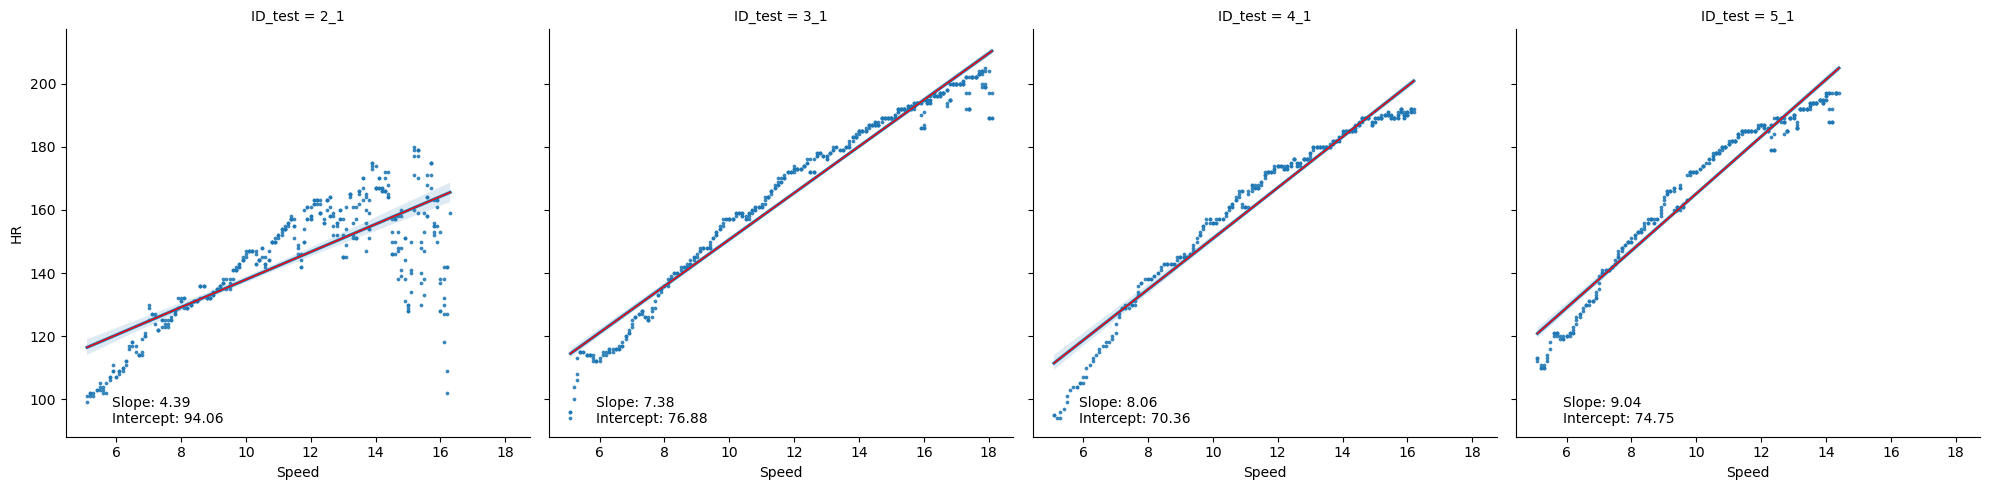

In [14]:
# List of values to filter for in the 'ID_test' column
id_test = ['2_1', '3_1', '4_1', '5_1']

# Filter the DataFrame based on 'ID_test' column values
id_test = test_df[(test_df['ID_test'].isin(id_test))]

# Plot the graph
plot = sns.lmplot(data=id_test, x='Speed', y='HR', col='ID_test', scatter_kws={'s': 3})

# Iterate over unique ID_test values
for ax in plot.axes.flat:
    ID_test_value = ax.get_title().split('=')[1].strip()  # Extract ID_test value from the title
    subset_data = id_test[id_test['ID_test'] == ID_test_value]
    
    # Perform linear regression
    reg = np.polyfit(subset_data['Speed'], subset_data['HR'], deg=1)
    slope, intercept = reg
    
    # Plot the regression line
    ax.plot(subset_data['Speed'], slope * subset_data['Speed'] + intercept, color='red', linewidth=1)
    
    # Annotate the slope and intercept on the chart
    ax.text(0.1, 0.1, f"Slope: {slope:.2f}\nIntercept: {intercept:.2f}",
            transform=ax.transAxes, fontsize=10, verticalalignment='top')

### Visualise ID_2 test

Text(0.5, 1.0, 'Regression Plot of ID_2 test')

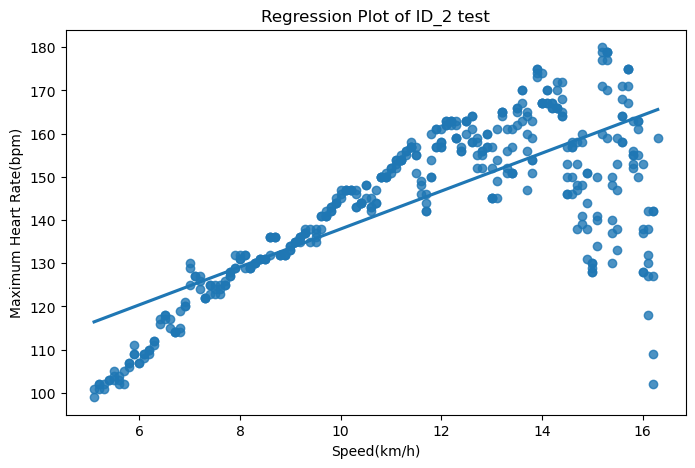

In [15]:
# Plot regression line for ID_test 2_1
ID_2 = test_df[test_df['ID_test'] == '2_1']

plt.figure(figsize = (8,5))
sns.regplot(data = ID_2 , x = 'Speed', y ='HR', ci = False)

# Name x-axis, y-axis, and title
plt.xlabel('Speed(km/h)')
plt.ylabel('Maximum Heart Rate(bpm)')
plt.title('Regression Plot of ID_2 test')

 ## Remove Outlier from each ID_test using a threshold of 10

In [16]:
# Group the data by 'ID_test'
grouped_data = test_df.groupby('ID_test')

 # Set the threshold
threshold = 10 

filtered_data = []
for group_name, group_data in grouped_data:
    
    # Fit a linear regression model
    model = LinearRegression().fit(group_data['Speed'].values.reshape(-1, 1), group_data['HR'].values)
    
    # Calculate residuals
    residuals = np.abs(group_data['HR'].values - model.predict(group_data['Speed'].values.reshape(-1, 1)))
    
    # Create a mask for points within the threshold
    mask = residuals <= threshold
    
    # Apply the mask to filter out outliers
    filtered_group_data = group_data[mask]
    
    # Append filtered group data to the list
    filtered_data.append(filtered_group_data)

# Concatenate the filtered groups back into a DataFrame
test_df1 = pd.concat(filtered_data)

# View the shape
test_df1.shape

(345645, 7)

### Visualise ID_2 after outliers have been removed

Text(0.5, 1.0, 'Regression Plot of ID_2 test')

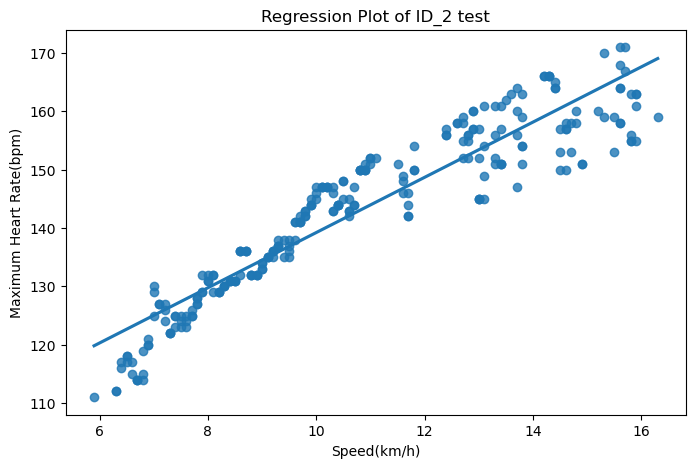

In [17]:
# Plot regression line for ID_test 2_1
ID_2 = test_df1[test_df1['ID_test'] == '2_1']

plt.figure(figsize = (8,5))
sns.regplot(data = ID_2 , x = 'Speed', y ='HR', ci = False)

# Name x-axis, y-axis, and title
plt.xlabel('Speed(km/h)')
plt.ylabel('Maximum Heart Rate(bpm)')
plt.title('Regression Plot of ID_2 test')

### Visualise ID_2 test before and after outlier has been removed

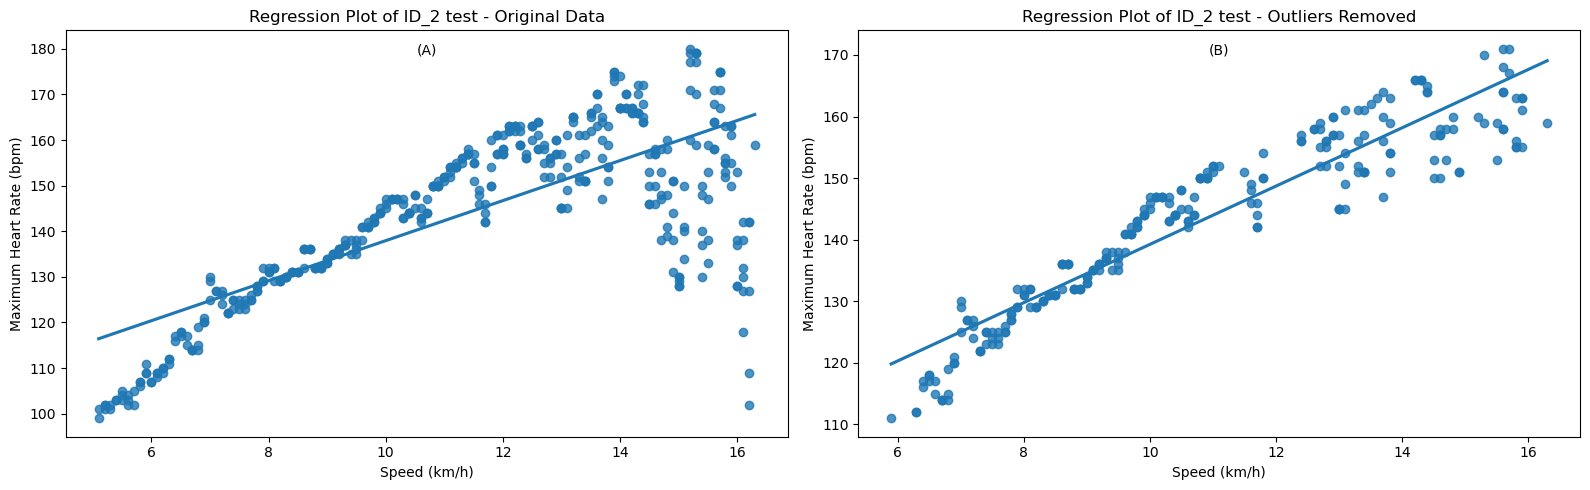

In [18]:
# Plot regression line for ID_test 2_1 from test_df
ID_2_df = test_df[test_df['ID_test'] == '2_1']
plt.figure(figsize=(16, 5))

plt.subplot(1, 2, 1)
sns.regplot(data=ID_2_df, x='Speed', y='HR', ci=False)
plt.xlabel('Speed (km/h)')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.title('Regression Plot of ID_2 test - Original Data')
plt.text(0.5, 0.95, '(A)', transform=plt.gca().transAxes, ha='center', va='center')

# Plot regression line for ID_test 2_1 from test_df1 (with outliers removed)
ID_2_df1 = test_df1[test_df1['ID_test'] == '2_1']

plt.subplot(1, 2, 2)
sns.regplot(data=ID_2_df1, x='Speed', y='HR', ci=False)
plt.xlabel('Speed (km/h)')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.title('Regression Plot of ID_2 test - Outliers Removed')
plt.text(0.5, 0.95, '(B)', transform=plt.gca().transAxes, ha='center', va='center')

plt.tight_layout()
plt.show()

## Filter out Minimum Heart Rate (HR_min) from the dataset

In [19]:
# Find the minimum heart rate for each 'ID_test'
min_hr_values = test_df1.groupby('ID_test')['HR'].transform('min')

# Create a new column 'HR_min' containing the minimum heart rate for each 'ID_test'
test_df1['HR_min'] = min_hr_values
test_df1.head()

,time,Speed,HR,RR,VE,ID_test,ID,HR_min
68932,198,5.5,96.0,32,22.4,100_1,100,96.0
68933,202,5.5,100.0,32,22.4,100_1,100,96.0
68934,203,5.6,99.0,30,23.3,100_1,100,96.0
68935,205,5.6,101.0,30,24.4,100_1,100,96.0
68936,208,5.6,104.0,29,21.2,100_1,100,96.0


## Find the slope and intercept of each ID_test

In [20]:
# Define a function to calculate slope and intercept for each group
def calculate_slope_and_intercept(group):
    x = group['Speed'].values
    y = group['HR'].values
    slope, intercept, _, _, _ = linregress(x, y)
    return slope, intercept

# Calculate slope and intercept for each unique ID_test using groupby and apply
slope_values, intercept_values = zip(*test_df1.groupby('ID_test').apply(calculate_slope_and_intercept))

# Create a DataFrame with calculated slopes and intercepts
result_df = pd.DataFrame({'ID_test': test_df1['ID_test'].unique(), 'slope': slope_values, 'intercept': intercept_values})

# Merge the calculated slopes and intercepts back to the original DataFrame
test_df = test_df1.merge(result_df, on='ID_test', suffixes=('', '_new'))
test_df.head()

,time,Speed,HR,RR,VE,ID_test,ID,HR_min,slope,intercept
0,198,5.5,96.0,32,22.4,100_1,100,96.0,6.251222,72.995565
1,202,5.5,100.0,32,22.4,100_1,100,96.0,6.251222,72.995565
2,203,5.6,99.0,30,23.3,100_1,100,96.0,6.251222,72.995565
3,205,5.6,101.0,30,24.4,100_1,100,96.0,6.251222,72.995565
4,208,5.6,104.0,29,21.2,100_1,100,96.0,6.251222,72.995565


In [21]:
# Check the statistics of the numerical variables of the new dataframe
test_df.describe()

,time,Speed,HR,RR,VE,ID,HR_min,slope,intercept
count,345645.000000,345645.000000,345645.000000,345645.000000,345645.000000,345645.000000,345645.000000,345645.000000,345645.000000
mean,627.664968,12.022091,158.571316,39.310347,77.548140,419.195915,106.289951,6.971327,76.414641
std,239.465712,3.549389,25.239919,12.015647,31.511182,244.804523,15.789711,1.894283,21.732898
min,0.000000,5.100000,68.000000,6.000000,7.500000,1.000000,68.000000,-0.745620,-12.357251
25%,446.000000,9.000000,142.000000,30.000000,53.700000,199.000000,95.000000,5.841850,61.205691
50%,629.000000,12.000000,163.000000,39.000000,73.600000,420.000000,105.000000,6.759923,75.747465
75%,800.000000,14.900000,178.000000,47.000000,99.200000,622.000000,117.000000,7.899521,89.424294
max,1487.000000,22.900000,214.000000,100.000000,207.100000,857.000000,170.000000,19.725869,174.172691


### Remove negative slope and intercept

In [22]:
negative_slope_intercept = test_df[(test_df['slope'] < 0) | (test_df['intercept'] < 0)]

# Print or manipulate the DataFrame with negative slope values
negative_slope_intercept.shape

(659, 10)

In [23]:
# Drop rows with negative slope or intercept from the original DataFrame
test_df = test_df.drop(index=negative_slope_intercept.index)

# Optionally, you can reset the index if needed
test_df = test_df.reset_index(drop=True)

# Print or manipulate the updated DataFrame
test_df.shape

(344986, 10)

### Filter out only the MHR from each ID_test 

In [24]:
# Find the indices of the maximum 'HR_max' value for each 'ID_test'
max_indices = test_df.groupby('ID_test')['HR'].idxmax()

# Use the indices to filter the final DataFrame
max_hr_df = test_df.loc[max_indices].rename(columns = {'HR':'HR_max'})

# Display the shape and filtered DataFrame
print(max_hr_df.shape)

max_hr_df.head()

(989, 10)


,time,Speed,HR_max,RR,VE,ID_test,ID,HR_min,slope,intercept
370,807,15.6,168.0,46,102.5,100_1,100,96.0,6.251222,72.995565
586,784,15.3,186.0,46,116.6,101_1,101,129.0,4.279054,111.891197
817,668,13.4,197.0,41,123.7,102_1,102,126.0,8.161304,89.862554
1203,673,15.6,186.0,61,144.8,103_1,103,101.0,7.426973,75.499276
1605,950,18.6,175.0,47,116.0,104_1,104,106.0,4.084942,95.786968


### Read the Information Dataset

In [25]:
# Read the data
info_df = pd.read_csv('subject-info.csv')

# Display the shape and dataframe
print(info_df.shape)

info_df.head()

(992, 8)


,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1


In [26]:
# Check for missing value and data type
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          992 non-null    float64
 1   Weight       992 non-null    float64
 2   Height       992 non-null    float64
 3   Humidity     962 non-null    float64
 4   Temperature  962 non-null    float64
 5   Sex          992 non-null    int64  
 6   ID           992 non-null    int64  
 7   ID_test      992 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 62.1+ KB


In [27]:
# Check for missing values
info_df.isna().sum()

Age             0
Weight          0
Height          0
Humidity       30
Temperature    30
Sex             0
ID              0
ID_test         0
dtype: int64

In [28]:
# Confirm Age data type from float to integer
info_df.Age = info_df.Age.astype(int)

### Create a BMI data using height and weight

In [29]:
# Convert height from centimeters to meters (1 meter = 100 centimeters)
info_df['Height_m'] = info_df['Height'] / 100  

# Calculate BMI and add it as a new column 'BMI' to info_df
info_df['BMI'] = info_df['Weight'] / (info_df['Height_m'] ** 2)

# Round the 'BMI' column to 2 decimal places
info_df['BMI'] = info_df['BMI'].round(2)

### Merged test measurement and information data

In [30]:
# Merge test_df with info_df based on the 'ID_test' column
merged_df = pd.merge(max_hr_df, info_df[['ID_test', 'Age', 'BMI', 'Sex']], on='ID_test', how='left')

# View the shape of the merged dataframe
print(merged_df.shape)

(989, 13)


## Save the cleaned data

In [31]:
# Save merged_df to data
merged_df.to_csv('data.csv', index=False)

## Read saved data

In [32]:
data = pd.read_csv('data.csv')
data.head()

,time,Speed,HR_max,RR,VE,ID_test,ID,HR_min,slope,intercept,Age,BMI,Sex
0,807,15.6,168.0,46,102.5,100_1,100,96.0,6.251222,72.995565,42,27.25,0
1,784,15.3,186.0,46,116.6,101_1,101,129.0,4.279054,111.891197,41,27.06,0
2,668,13.4,197.0,41,123.7,102_1,102,126.0,8.161304,89.862554,31,33.71,0
3,673,15.6,186.0,61,144.8,103_1,103,101.0,7.426973,75.499276,33,25.50,0
4,950,18.6,175.0,47,116.0,104_1,104,106.0,4.084942,95.786968,31,25.18,0


## Exploratory Data Analysis

### Visualise number of male and female

Text(0.5, 0, 'Gender')

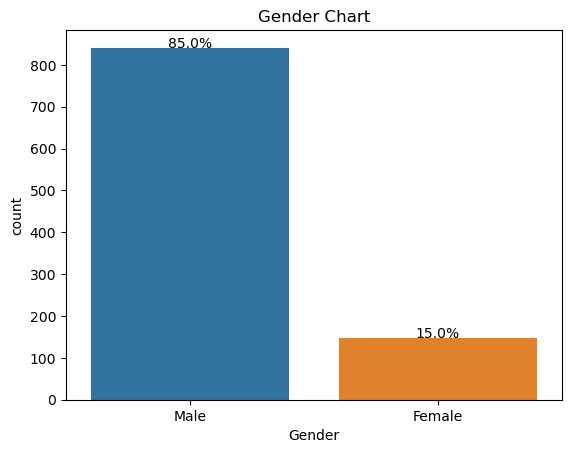

In [34]:
# Map values in the 'Sex' column to 'Male' and 'Female'
data['Sex'] = data['Sex'].map({0: 'Male', 1: 'Female'})

# Create a plot for the Gender column
gender_plot = sns.countplot(data=data, x='Sex')

# Calculate the total count of gender
total_frequency = len(data['Sex'])

# Loop through each bar in the plot
for p in gender_plot.patches:
    # Get the percentage value for the bar
    percentage = p.get_height() / total_frequency * 100
    
    # Add the percentage as text above the bar
    gender_plot.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline', fontsize=10)

# Give the plot a title and name the x-axis
gender_plot.set_title('Gender Chart')
gender_plot.set_xlabel('Gender')

In [35]:
# Number of male and female in the dataset
data['Sex'].value_counts()

Male      841
Female    148
Name: Sex, dtype: int64

## Correlation Matrix

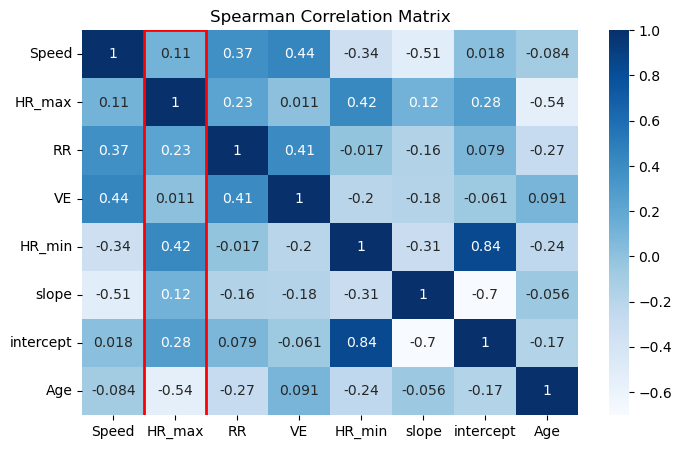

In [36]:
# Create a heatmap for the dataset
selected_var = data.drop(['ID', 'ID_test', 'time', 'Sex', 'BMI'], axis=1)

plt.figure(figsize=(8, 5))
sns.heatmap(selected_var.corr(method='spearman'), annot=True, cmap='Blues')

# Highlight the row corresponding to 'HR_max'
hr_max_index = selected_var.columns.get_loc('HR_max')
plt.gca().add_patch(plt.Rectangle((hr_max_index, 0), 1, len(selected_var), fill=False, edgecolor='red', lw=2))

plt.title('Spearman Correlation Matrix')
plt.show()

## Check for Outliers using Boxplot

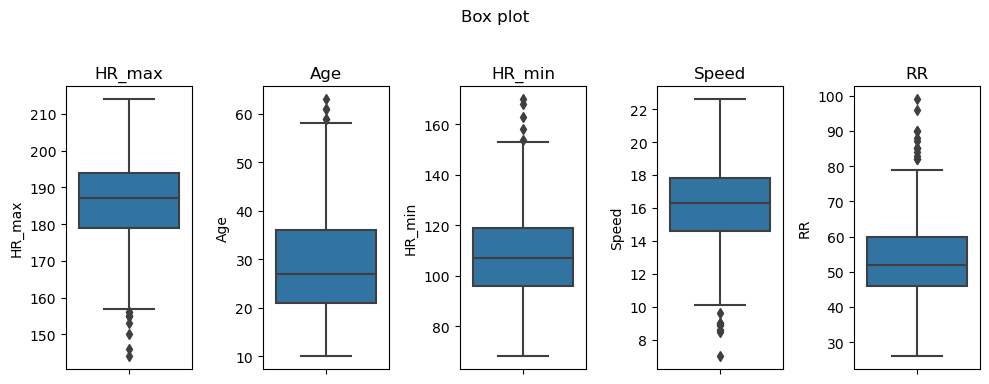

In [37]:
# Create a figure with 1 row and 4 columns
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

# Add a heading
fig.suptitle('Box plot', fontsize=12)

# Box plot for 'HR_max' column
sns.boxplot(y=data['HR_max'], ax=axes[0])
axes[0].set_title('HR_max')

# Box plot for 'Age' column
sns.boxplot(y=data['Age'], ax=axes[1])
axes[1].set_title('Age')

# Box plot for 'HR_min' column
sns.boxplot(y=data['HR_min'], ax=axes[2])
axes[2].set_title('HR_min')

# Box plot for 'Speed' column
sns.boxplot(y=data['Speed'], ax=axes[3])
axes[3].set_title('Speed')

# Box plot for 'Speed' column
sns.boxplot(y=data['RR'], ax=axes[4])
axes[4].set_title('RR')

# Adjust spacing for the title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

## Replace RR < 18 and RR > 60 with the median value of RR

In [45]:
# Identify and replace outliers
RR_outliers = (data['RR'] < 18) | (data['RR'] > 60)
median_RR = np.median(data['RR'])  

# Replace the outlier values with the median of 'RR'
data.loc[RR_outliers, 'RR'] = median_RR

## Identify Outliers in HR_min and replace them with the median value of HR_min

In [39]:
# Calculate the IQR (Interquartile Range)
Q1 = data['HR_min'].quantile(0.25)
Q3 = data['HR_min'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and replace outliers with the median value
outliers_HR_min = (data['HR_min'] < lower_bound) | (data['HR_min'] > upper_bound)
data[outliers_HR_min]

,time,Speed,HR_max,RR,VE,ID_test,ID,HR_min,slope,intercept,Age,BMI,Sex
433,382,11.3,183.0,28,54.1,440_1,440,163.0,0.108577,174.172691,16,21.72,Male
465,577,11.8,202.0,49,69.3,466_1,466,154.0,6.605585,124.783609,19,26.50,Female
488,445,9.6,197.0,46,72.9,486_1,486,168.0,6.569022,132.224947,44,22.21,Female
714,951,11.1,195.0,54,87.6,645_1,645,158.0,5.472718,133.575014,14,24.58,Female
918,732,7.0,195.0,28,83.2,817_1,817,170.0,8.680720,131.479561,16,23.05,Male


In [40]:
median_HR_min = data['HR_min'].median()

# Replace the outlier values with the median of 'HR_min'
data.loc[outliers_HR_min, 'HR_min'] = median_HR_min

## Use a sample of 300 to visualise some features

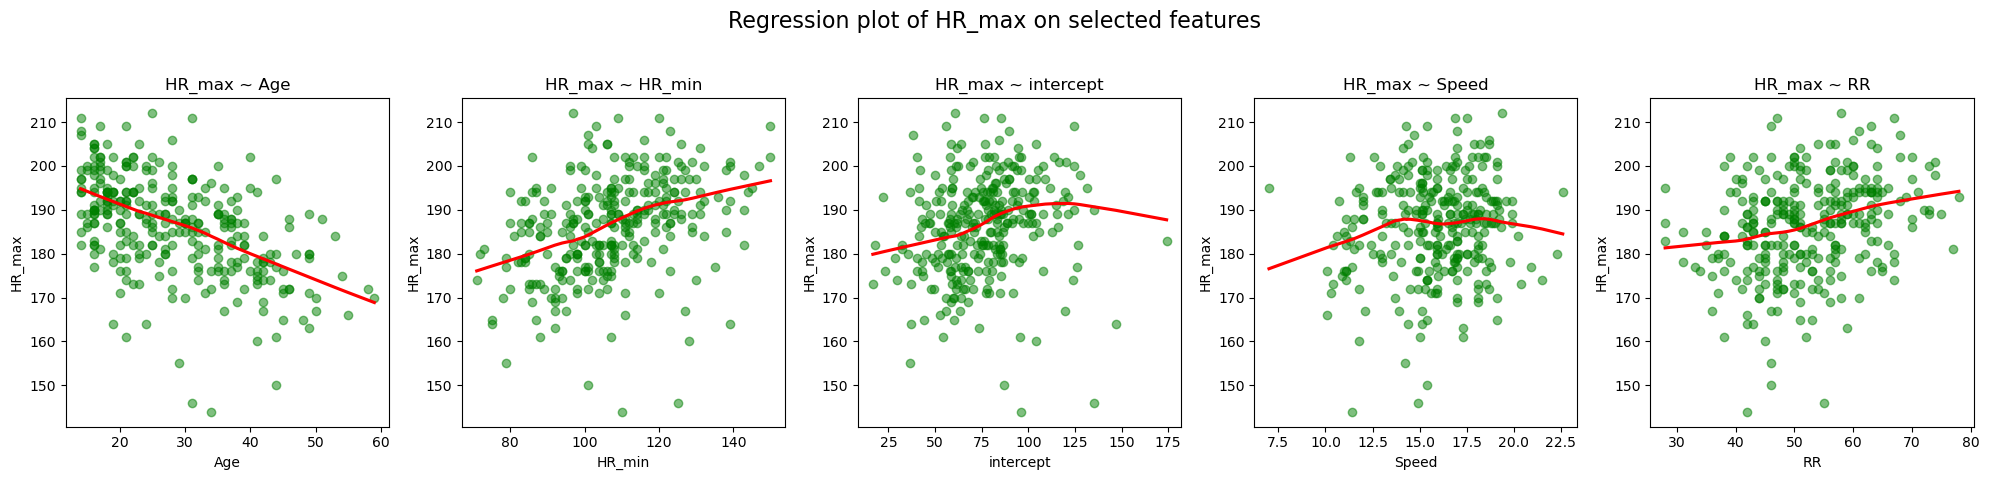

In [68]:
# Use sample of 300 
sample_data = data.sample(n=300, random_state=42)

# Create a figure with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

# Add a heading
fig.suptitle('Regression plot of HR_max on selected features', fontsize=16)

# Customize scatter plot appearance
scatter_kws = {'color': 'green', 'alpha': 0.5}

# Customize line appearance
line_kws = {'color': 'red'}

# Scatter plot for 'Age' and 'HR_max' with red line and faint points
sns.regplot(data=sample_data, x='Age', y='HR_max', lowess=True, ax=axes[0], scatter_kws=scatter_kws, line_kws=line_kws)
axes[0].set_title('HR_max ~ Age')

# Scatter plot for 'HR_min' and 'HR_max'
sns.regplot(data=sample_data, x='HR_min', y='HR_max', lowess=True, ax=axes[1], scatter_kws=scatter_kws, line_kws=line_kws)
axes[1].set_title('HR_max ~ HR_min')

# Scatter plot for 'intercept' and 'HR_max'
sns.regplot(data=sample_data, x='intercept', y='HR_max', lowess=True, ax=axes[2], scatter_kws=scatter_kws, line_kws=line_kws)
axes[2].set_title('HR_max ~ intercept')

# Scatter plot for 'Speed' and 'HR_max'
sns.regplot(data=sample_data, x='Speed', y='HR_max', lowess=True, ax=axes[3], scatter_kws=scatter_kws, line_kws=line_kws)
axes[3].set_title('HR_max ~ Speed')

# Scatter plot for 'Speed' and 'HR_max'
sns.regplot(data=sample_data, x='RR', y='HR_max', lowess=True, ax=axes[4], scatter_kws=scatter_kws, line_kws=line_kws)
axes[4].set_title('HR_max ~ RR')

# Adjust spacing for the title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

## Data Analysis

### Benchmark with Linear Mixed Model

### Our Model

In [79]:
def fit_mixed_model(predictor_variable, model_formula):
    # Fit the model using 'ID_test' as the grouping variable
    mixed_model = smf.mixedlm(model_formula, data=data, groups=data['ID'])
    
    # Fit the LMM
    results = mixed_model.fit(method='lbfgs')  
    # Calculate predictions
    y_pred = results.predict()

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(data['HR_max'], y_pred))

    # Calculate R-squared
    r2 = r2_score(data['HR_max'], y_pred)

    # Print the results
    print(f'\033[1mLinear Mixed-Effects Model for HR_max and {predictor_variable}:\033[0m')
    print(' ')
    print(f'y = {results.params[0]:.2f} + {results.params[1]:.2f}*{predictor_variable}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R2) Score: {r2:.2f}')
    print(' ')
    
# Define 'Age2' before using it in the model
data['Age2'] = data['Age']^2

# Fit the models for Age, Age2, and Age + Age2
fit_mixed_model('Age', 'HR_max ~ Age')
fit_mixed_model('Age2', 'HR_max ~ Age2')
fit_mixed_model('Age + Age2', 'HR_max ~ Age + Age2')

Linear Mixed-Effects Model for HR_max and Age:
 
y = 203.28 + -0.59*Age
Root Mean Squared Error (RMSE): 9.13
R-squared (R2) Score: 0.30
 
Linear Mixed-Effects Model for HR_max and Age2:
 
y = 202.73 + -0.57*Age2
Root Mean Squared Error (RMSE): 9.12
R-squared (R2) Score: 0.30
 
Linear Mixed-Effects Model for HR_max and Age + Age2:
 
y = 203.30 + -0.44*Age + Age2
Root Mean Squared Error (RMSE): 9.12
R-squared (R2) Score: 0.30
 


## Gellish Equation

In [82]:
def regression_model(x, y, equation_type='linear'):
    # Fit a linear regression model
    if equation_type == 'linear':
        prediction = 207 - 0.7 * x
    # Fit a quadratic regression model
    elif equation_type == 'quadratic':
        prediction = 192 - 0.007 * x**2
    else:
        raise ValueError("Invalid equation_type. Supported values are 'linear' or 'quadratic'.")
    
    # Compute RMSE and R-squared
    rmse = np.sqrt(mean_squared_error(y, prediction))
    r_squared = r2_score(y, prediction)
    
    print(f"\033[1m{equation_type.capitalize()} Regression Model:\033[0m")
    print(' ')
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r_squared:.4f}")
    print(' ')

# Example usage:
# Define x and y variable
x = data['Age']
y = data['HR_max']

# Apply the linear regression model
regression_model(x, y, equation_type='linear')

# Apply the quadratic regression model
regression_model(x, y, equation_type='quadratic')

Linear Regression Model:
 
RMSE: 9.2165
R-squared: 0.2828
 
Quadratic Regression Model:
 
RMSE: 9.3649
R-squared: 0.2595
 


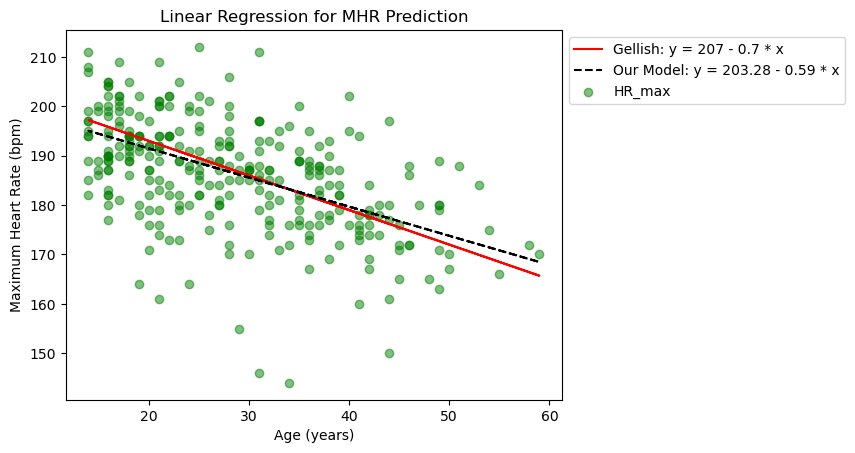

In [71]:
# Sample data
x = sample_data['Age']

y_1 = 207 - 0.7 * x
y_2 = 203.28 - 0.59 * x

# Plot the regression lines
plt.plot(x, y_1, label='Gellish: y = 207 - 0.7 * x', color='red')
plt.plot(x, y_2, label='Our Model: y = 203.28 - 0.59 * x', color='black', linestyle='--')  # Use linestyle='--' for a dashed line

# Add scatter plot with your actual dataset
plt.scatter(sample_data['Age'], sample_data['HR_max'], label='HR_max', color='green', marker='o', alpha=0.5)

# Add labels and title
plt.xlabel('Age (years)')
plt.ylabel('Maximum Heart Rate (bpm)')
plt.title('Linear Regression for MHR Prediction')

# Moving the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

## Convergence point of both models

In [83]:
# Define the variables
x, y = sp.symbols('x y')

# Define the equations
eq1 = sp.Eq(207 - 0.7 * x, 203.28 - 0.59 * x)

# Solve for x (age)
convergence_point_x = sp.solve(eq1, x)

# Substitute the found x value into one of the equations to find y (MHR)
convergence_point_y = 207 - 0.7 * convergence_point_x[0]

# Print the convergence point
print(f"Convergence Point (Age): {convergence_point_x[0]:.2f} years")
print(f"Convergence Point (MHR): {convergence_point_y:.2f} bpm")

Convergence Point (Age): 33.82 years
Convergence Point (MHR): 183.33 bpm


## LMM for other response variable

In [88]:
def fit_mixed_model(predictor_variable, model_formula):
    # Fit the model using 'ID_test' as the grouping variable
    mixed_model = smf.mixedlm(model_formula, data=data, groups=data['ID_test'])
    
    # Fit the LMM
    results = mixed_model.fit(method='lbfgs')  
    # Calculate predictions
    y_pred = results.predict()

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(data['HR_max'], y_pred))

    # Calculate R-squared
    r2 = r2_score(data['HR_max'], y_pred)

    # Print the results
    print(f'\033[1mLinear Mixed-Effects Model for HR_max and {predictor_variable}:\033[0m')
    print(' ')
    
    # Print the full regression equation
    print(f'y = {results.params[0]:.2f}', end='')
    if '+' in predictor_variable:
        terms = predictor_variable.split(' + ')
        for i, variable in enumerate(terms):
            print(f' + {results.params[i + 1]:.2f}*{variable}', end='')
    else:
        print(f' + {results.params[1]:.2f}*{predictor_variable}', end='')

    print(f'\nRoot Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R2) Score: {r2:.2f}')
    print(' ')
    

# Define 'Age2' before using it in the model
data['Age2'] = data['Age'] ** 2

# Fit the models for Age, Age2, and Age + Age2
fit_mixed_model('Age', 'HR_max ~ Age')
fit_mixed_model('Age + HR_min', 'HR_max ~ Age + HR_min')
fit_mixed_model('Age + HR_min + intercept', 'HR_max ~ Age + HR_min + intercept')
fit_mixed_model('Age + HR_min + intercept + RR', 'HR_max ~ Age + HR_min + intercept + RR')
fit_mixed_model('Age + HR_min + intercept + RR + slope', 'HR_max ~ Age + HR_min + intercept + RR + slope')
fit_mixed_model('Age + HR_min + intercept + RR + slope + Speed', 'HR_max ~ Age + HR_min + intercept + RR + slope + Speed')
fit_mixed_model('Age + HR_min + intercept + RR + Speed', 'HR_max ~ Age + HR_min + intercept + RR  + Speed')

Linear Mixed-Effects Model for HR_max and Age:
 
y = 203.29 + -0.59*Age
Root Mean Squared Error (RMSE): 9.13
R-squared (R2) Score: 0.30
 
Linear Mixed-Effects Model for HR_max and Age + HR_min:
 
y = 180.45 + -0.52*Age + 0.19*HR_min
Root Mean Squared Error (RMSE): 8.64
R-squared (R2) Score: 0.37
 
Linear Mixed-Effects Model for HR_max and Age + HR_min + intercept:
 
y = 174.88 + -0.51*Age + 0.32*HR_min + -0.11*intercept
Root Mean Squared Error (RMSE): 8.51
R-squared (R2) Score: 0.39
 
Linear Mixed-Effects Model for HR_max and Age + HR_min + intercept + RR:
 
y = 165.12 + -0.48*Age + 0.34*HR_min + -0.12*intercept + 0.14*RR
Root Mean Squared Error (RMSE): 8.41
R-squared (R2) Score: 0.40
 
Linear Mixed-Effects Model for HR_max and Age + HR_min + intercept + RR + slope:
 
y = 153.51 + -0.45*Age + 0.08*HR_min + 0.18*intercept + 0.17*RR + 2.14*slope
Root Mean Squared Error (RMSE): 8.21
R-squared (R2) Score: 0.43
 
Linear Mixed-Effects Model for HR_max and Age + HR_min + intercept + RR + slop

## Linear Regression

In [95]:
# Define a function to calculate linear regression for given independent variable
def calculate_linear_regression(x, y):
    
    # Split the data into training (80%), validation (10%), and test (10%) sets
    x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=0)
    x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

    # Create a StandardScaler instance
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Fit the regression model
    mlr = LinearRegression()
    mlr.fit(x_train, y_train)
    y_pred = mlr.predict(x_test)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return mlr, rmse, r2

# Define the independent variables
x = data[['Age', 'HR_min', 'intercept','RR','slope','Speed']]

# Define the dependent variable
y = data['HR_max']

# Define different combinations of independent variables
combinations = [
    ['Age'],
    ['Age', 'HR_min'],
    ['Age', 'HR_min', 'intercept'],
    ['Age', 'HR_min', 'intercept','RR'],
    ['Age', 'HR_min', 'intercept', 'RR','slope'],
    ['Age', 'HR_min', 'intercept', 'RR','slope', 'Speed'],
]

# Calculate linear regression for each combination
for variables in combinations:
    x_combination = x[variables]
    regression_model, rmse, r2 = calculate_linear_regression(x_combination, y)

    print(f'\033[1mLinear Regression Model for {", ".join(variables)}:\033[0m')
    print(f'RMSE: {rmse:.2f}')
    print(f'R-squared: {r2:.2f}')
    print(' ')

Linear Regression Model for Age:
RMSE: 9.84
R-squared: 0.34
 
Linear Regression Model for Age, HR_min:
RMSE: 9.53
R-squared: 0.38
 
Linear Regression Model for Age, HR_min, intercept:
RMSE: 9.33
R-squared: 0.41
 
Linear Regression Model for Age, HR_min, intercept, RR:
RMSE: 9.04
R-squared: 0.44
 
Linear Regression Model for Age, HR_min, intercept, RR, slope:
RMSE: 8.77
R-squared: 0.48
 
Linear Regression Model for Age, HR_min, intercept, RR, slope, Speed:
RMSE: 5.18
R-squared: 0.82
 


## Non-Linear Regression

In [96]:
# Define the independent variables
x = data[['Age', 'HR_min','intercept', 'RR', 'slope', 'Speed']]

# Define the dependent variable
y = data['HR_max']

# Split the data into training (80%), validation (10%), and test (10%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

# Create a StandardScaler instance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
    
# Define models and their corresponding names
models = {
    'Polynomial Regression': make_pipeline(PolynomialFeatures(2), LinearRegression()),
    'Random Forest': RandomForestRegressor(random_state=0),
    'Lasso Regression': Lasso(alpha=0.1),
    'SVR': SVR(),
    'Ridge Regression': Ridge(), 
}

# Dictionary to store results
results = {'Model': [], 'RMSE': [], 'R Squared': []}

# Loop through models, fit, predict, and store results
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results['Model'].append(name)
    results['RMSE'].append(rmse)
    results['R Squared'].append(r2)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Print the sorted DataFrame
print(results_df)

                   Model      RMSE  R Squared
0  Polynomial Regression  3.238322   0.928628
1          Random Forest  6.669567   0.697250
2       Lasso Regression  5.094212   0.823379
3                    SVR  6.767696   0.688276
4       Ridge Regression  5.066966   0.825263


## Cross Validation

In [97]:
# Define models and their corresponding names
models = {
    'Polynomial Regression': make_pipeline(PolynomialFeatures(), LinearRegression()),
    'Random Forest': RandomForestRegressor(random_state=0),
    'Lasso Regression': Lasso(),
    'SVR': SVR(),
    'Ridge Regression': Ridge(),
}

# Perform cross-validation and store MSE and R2 scores in lists
rmse_scores = []
r2_scores = []

for name, model in models.items():  # Use .items() to iterate through dictionary items
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)  # Specify the number of splits and set a random state for reproducibility
    rmse_cv = -cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    r2_cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    
    rmse_scores.append(np.mean(rmse_cv))
    r2_scores.append(np.mean(r2_cv))

# Create a DataFrame from the scores
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'RMSE': rmse_scores,
    'R2': r2_scores
})

# Print the DataFrame
print(results_df)

                   Model      RMSE        R2
0  Polynomial Regression  3.011766  0.918283
1          Random Forest  6.516619  0.616276
2       Lasso Regression  7.529217  0.489558
3                    SVR  6.556690  0.613581
4       Ridge Regression  5.291798  0.746707


## Grid Search

In [98]:
# Features and target variable
x = data[['Age', 'Speed', 'HR_min', 'slope', 'intercept']]
y = data['HR_max']

# Split the data into training (80%), validation (10%), and test (10%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=0)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

# Create a StandardScaler instance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Define hyperparameters and their possible values for each model
param_grid_ridge = {
    'alpha': [0.1, 1, 10]
}

param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100]
}

param_grid_lasso = {
    'alpha': [0.1, 1, 10]
}

param_grid_poly = {
    'polynomialfeatures__degree': [2, 3, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create models
ridge = Ridge()
svr = SVR()
lasso = Lasso()
poly = make_pipeline(PolynomialFeatures(), Ridge())
rf = RandomForestRegressor()

# Perform grid search with cross-validation for each model
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid_ridge, cv=5, scoring='neg_root_mean_squared_error')
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, scoring='neg_root_mean_squared_error')
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid_lasso, cv=5, scoring='neg_root_mean_squared_error')
grid_search_poly = GridSearchCV(estimator=poly, param_grid=param_grid_poly, cv=5, scoring='neg_root_mean_squared_error')
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_root_mean_squared_error')

# Fit the models with grid search
grid_search_ridge.fit(x_train, y_train)
grid_search_svr.fit(x_train, y_train)
grid_search_lasso.fit(x_train, y_train)
grid_search_poly.fit(x_train, y_train)  # Separate grid search for Polynomial Regression
grid_search_rf.fit(x_train, y_train)

# Get the best hyperparameters for each model
best_params_ridge = grid_search_ridge.best_params_
best_params_svr = grid_search_svr.best_params_
best_params_lasso = grid_search_lasso.best_params_
best_params_poly = grid_search_poly.best_params_
best_params_rf = grid_search_rf.best_params_

print("Best Hyperparameters for Ridge Regression:", best_params_ridge)
print("Best Hyperparameters for SVR:", best_params_svr)
print("Best Hyperparameters for Lasso Regression:", best_params_lasso)
print("Best Hyperparameters for Polynomial Regression:", best_params_poly)
print("Best Hyperparameters for Random Forest:", best_params_rf)

Best Hyperparameters for Ridge Regression: {'alpha': 0.1}
Best Hyperparameters for SVR: {'C': 100, 'kernel': 'rbf'}
Best Hyperparameters for Lasso Regression: {'alpha': 0.1}
Best Hyperparameters for Polynomial Regression: {'polynomialfeatures__degree': 2}
Best Hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 150}


## Hyper-parameter

In [101]:
# Define models and their corresponding names
models = {
    'Polynomial Regression': make_pipeline(PolynomialFeatures(2), LinearRegression()),
    'Random Forest': RandomForestRegressor(max_depth = 20, min_samples_split = 2, n_estimators = 150, random_state=0),
    'Lasso Regression': Lasso(alpha=0.1),
    'SVR': SVR(C = 100, kernel = 'rbf'),
    'Ridge Regression': Ridge(alpha = 0.1),
}

# Perform cross-validation and store MSE and R2 scores in lists
rmse_scores = []
r2_scores = []

for name, model in models.items():  # Use .items() to iterate through dictionary items
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)  # Specify the number of splits and set a random state for reproducibility
    rmse_cv = -cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    r2_cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    
    rmse_scores.append(np.mean(rmse_cv))
    r2_scores.append(np.mean(r2_cv))

# Create a DataFrame from the scores
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'RMSE': rmse_scores,
    'R2': r2_scores
})

# Print the DataFrame
print(results_df)

                   Model      RMSE        R2
0  Polynomial Regression  2.983053  0.919801
1          Random Forest  6.388464  0.631406
2       Lasso Regression  5.331991  0.742978
3                    SVR  3.482127  0.889680
4       Ridge Regression  5.286652  0.747199


## Visualisation of Hyper-parameter tuning model

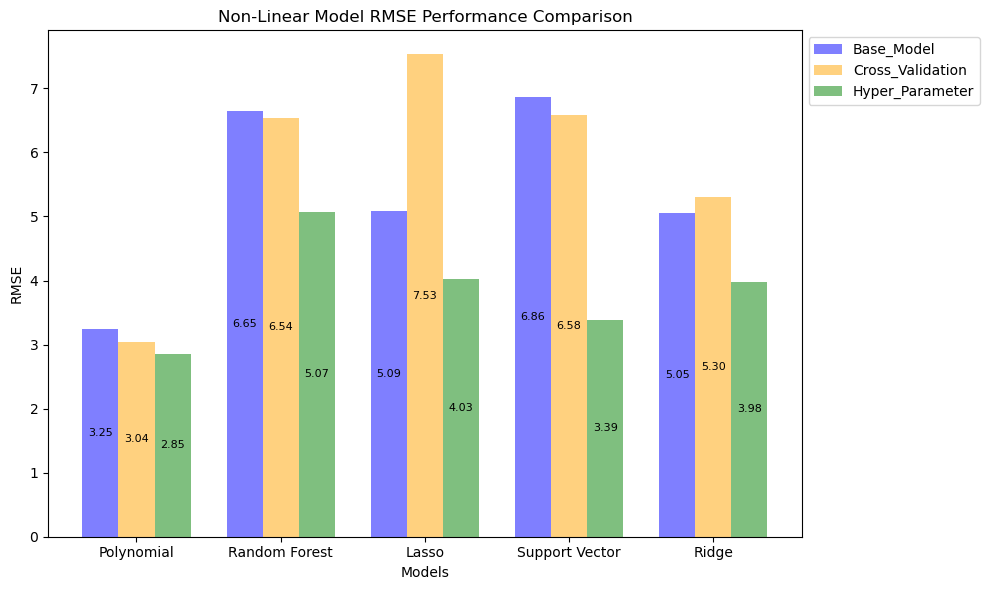

In [65]:
# Define the data
models = ['Polynomial', 'Random Forest', 'Lasso', 'Support Vector', 'Ridge']

Base_Model = [3.25, 6.65, 5.09, 6.86, 5.05]
Cross_Validation = [3.04, 6.54, 7.53, 6.58, 5.30]
Hyper_Parameter = [2.85, 5.07, 4.03, 3.39, 3.98]

# Create x-positions for the groups of bars
x_positions = np.arange(len(models))

# Define bar width
bar_width = 0.25  # Reduced bar width for better separation

# Plot the bar
plt.figure(figsize=(10, 6))

bar1 = plt.bar(x_positions - bar_width, Base_Model, width=bar_width, label='Base_Model', alpha=0.5, color = 'blue')
bar2 = plt.bar(x_positions, Cross_Validation, width=bar_width, label='Cross_Validation', alpha=0.5, color = 'orange')
bar3 = plt.bar(x_positions + bar_width, Hyper_Parameter, width=bar_width, label='Hyper_Parameter', alpha=0.5, color = 'green')

# Add RMSE values as labels inside each bar
def add_rmse_labels(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{value:.2f}',
                 ha='center', va='center', color='black', fontsize=8)

add_rmse_labels(bar1, Base_Model)
add_rmse_labels(bar2, Cross_Validation)
add_rmse_labels(bar3, Hyper_Parameter)

# Title the plot and labels
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Non-Linear Model RMSE Performance Comparison')

# Set x-axis tick positions and labels
plt.xticks(x_positions, models)

# Move the legend outside the bars
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

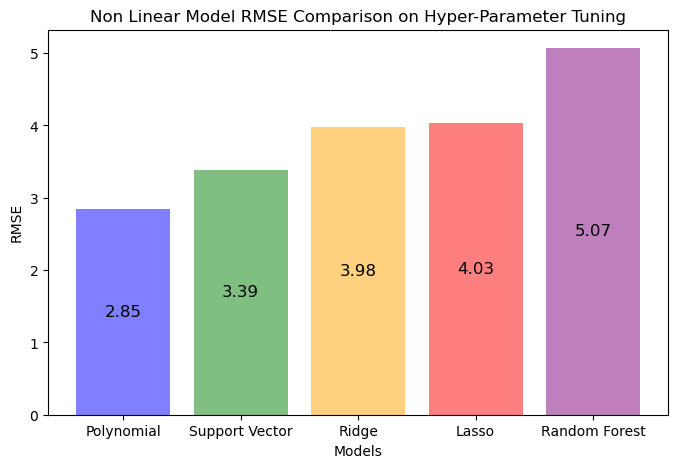

In [66]:
# Define the data
models = ['Polynomial', 'Random Forest', 'Lasso', 'Support Vector','Ridge']
RMSE = [2.85, 5.07, 4.03, 3.39, 3.98]

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'red', 'purple']

# Arrange data in ascending order
sorted_indices = np.argsort(RMSE)
models = [models[i] for i in sorted_indices]
RMSE = [RMSE[i] for i in sorted_indices]

# Create x-positions for the groups of bars
x_positions = np.arange(len(models))

# Plot the bar chart with bars arranged in ascending order
plt.figure(figsize=(8, 5))
bar1 = plt.bar(x_positions, RMSE, label='RMSE', alpha=0.5, color = colors)

# Add RMSE values as labels inside each bar
def add_rmse_labels(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{value:.2f}',
                 ha='center', va='center', color='black', fontsize=12)

add_rmse_labels(bar1, RMSE)

# Title the plot and labels
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Non Linear Model RMSE Comparison on Hyper-Parameter Tuning')
plt.xticks(x_positions, models)  # Set x-axis tick positions and labels
plt.show()


## Compare different Speed limit range

In [67]:
slow_speed = test_df[test_df.Speed <=10]
medium_speed = test_df[test_df.Speed <=15]

In [68]:
# Find the indices of the maximum 'HR_max' value for each 'ID_test'
max_speed_indices = slow_speed.groupby('ID_test')['HR'].idxmax()

# Use the indices to filter the final DataFrame
max_hr_df = slow_speed.loc[max_speed_indices].rename(columns = {'HR':'HR_max'})

# Merge test_df with info_df based on the 'ID_test' column
merged_df2 = pd.merge(max_hr_df, info_df[['ID_test', 'Age', 'BMI', 'Sex']], on='ID_test', how='left')

# Verify the shape of the merged dataframe
print(merged_df2.shape)

(989, 13)


## Speed <=10km

In [69]:
# Features and target variable
x = merged_df2[['Age','HR_min', 'intercept', 'RR','slope','Speed']]
y = merged_df2['HR_max']

# Split the data into training (80%), validation (10%), and test (10%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Define models and their corresponding names
models = {
    'Polynomial Regression': make_pipeline(PolynomialFeatures(2), LinearRegression()),
    'Random Forest': RandomForestRegressor(max_depth = 20, min_samples_split = 2, n_estimators = 100, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1),
    'SVR': SVR(C = 100, kernel = 'rbf'),
    'Ridge Regression': Ridge(alpha = 1),
}

# Perform cross-validation and store MSE and R2 scores in lists
rmse_scores = []
r2_scores = []

for name, model in models.items():  # Use .items() to iterate through dictionary items
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Specify the number of splits and set a random state for reproducibility
    rmse_cv = -cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    r2_cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    
    rmse_scores.append(np.mean(rmse_cv))
    r2_scores.append(np.mean(r2_cv))

# Create a DataFrame from the scores
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Mean(RMSE)': rmse_scores,
    'Mean(R2)': r2_scores
})

# Print the DataFrame
print(results_df)

                   Model  Mean(RMSE)  Mean(R2)
0  Polynomial Regression    2.693868  0.972453
1          Random Forest    5.280851  0.893482
2       Lasso Regression    2.880912  0.968442
3                    SVR    3.500012  0.952202
4       Ridge Regression    2.828910  0.969587


In [70]:
# Find the indices of the maximum 'HR_max' value for each 'ID_test'
max_speed_indices = medium_speed.groupby('ID_test')['HR'].idxmax()

# Use the indices to filter the final DataFrame
max_hr_df = medium_speed.loc[max_speed_indices].rename(columns = {'HR':'HR_max'})

# Merge test_df with info_df based on the 'ID_test' column
merged_df3 = pd.merge(max_hr_df, info_df[['ID_test', 'Age', 'BMI', 'Sex']], on='ID_test', how='left')

# Verify the shape of the merged dataframe
print(merged_df3.shape)

(989, 13)


## ## Speed <=15km

In [71]:
# Features and target variable
x = merged_df3[['Age', 'Speed', 'HR_min', 'slope', 'intercept']]
y = merged_df3['HR_max']

# Split the data into training (80%), validation (10%), and test (10%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Define models and their corresponding names
models = {
    'Polynomial Regression': make_pipeline(PolynomialFeatures(2), LinearRegression()),
    'Random Forest': RandomForestRegressor(max_depth = 20, min_samples_split = 2, n_estimators = 100, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1),
    'SVR': SVR(C = 100, kernel = 'rbf'),
    'Ridge Regression': Ridge(alpha = 1),
}

# Perform cross-validation and store MSE and R2 scores in lists
rmse_scores = []
r2_scores = []

for name, model in models.items():  # Use .items() to iterate through dictionary items
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # Specify the number of splits and set a random state for reproducibility
    rmse_cv = -cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    r2_cv = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    
    rmse_scores.append(np.mean(rmse_cv))
    r2_scores.append(np.mean(r2_cv))

# Create a DataFrame from the scores
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'RMSE': rmse_scores,
    'R2': r2_scores
})

# Print the DataFrame
print(results_df)

                   Model      RMSE        R2
0  Polynomial Regression  2.825504  0.947659
1          Random Forest  4.931187  0.841686
2       Lasso Regression  4.019500  0.894321
3                    SVR  3.290642  0.928332
4       Ridge Regression  3.976889  0.896439


## Model Evaluation visualisation

## Different Speed Limit Visualisation

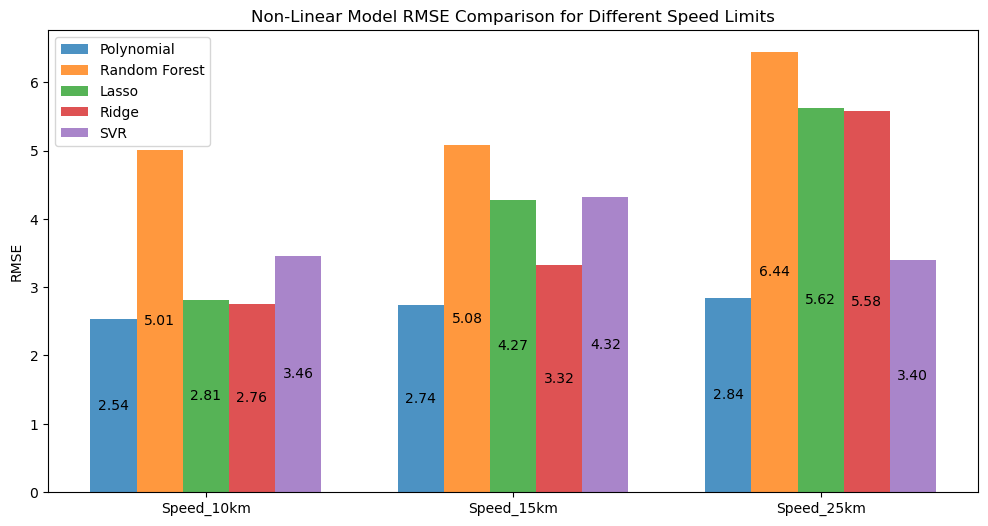

In [72]:
def create_multiple_bar_chart(speed_limit, model_names, *model_data, bar_width=0.15):
    # Create x-positions for the groups of bars
    x_positions = np.arange(len(speed_limit))

    # Plot the multiple bar chart
    plt.figure(figsize=(12, 6))

    bars = []
    for i, data in enumerate(model_data):
        bars.append(plt.bar(x_positions + (i - len(model_data)//2) * bar_width, data,
                            width=bar_width, label=model_names[i], alpha=0.8))

    # Add values inside each bar
    def add_values_inside_bars():
        for bar_group in bars:
            for bar in bar_group:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}',
                         ha='center', va='center', color='black', fontsize=10)

    add_values_inside_bars()

    # Title the plot and labels
    #plt.xlabel('Speed Limit')
    plt.ylabel('RMSE')
    plt.title('Non-Linear Model RMSE Comparison for Different Speed Limits')
    plt.xticks(x_positions, speed_limit)  # Set x-axis tick positions and labels
    plt.legend()
    plt.show()

# Example usage
speed_limit = ['Speed_10km', 'Speed_15km', 'Speed_25km']
model_names = ['Polynomial', 'Random Forest', 'Lasso', 'Ridge', 'SVR']
polynomial = [2.54, 2.74, 2.84]
random_forest = [5.01, 5.08, 6.44]
lasso = [2.81, 4.27, 5.62]
ridge = [2.76, 3.32, 5.58]
svr = [3.46, 4.32, 3.40]

create_multiple_bar_chart(speed_limit, model_names, polynomial, random_forest, lasso, ridge, svr)


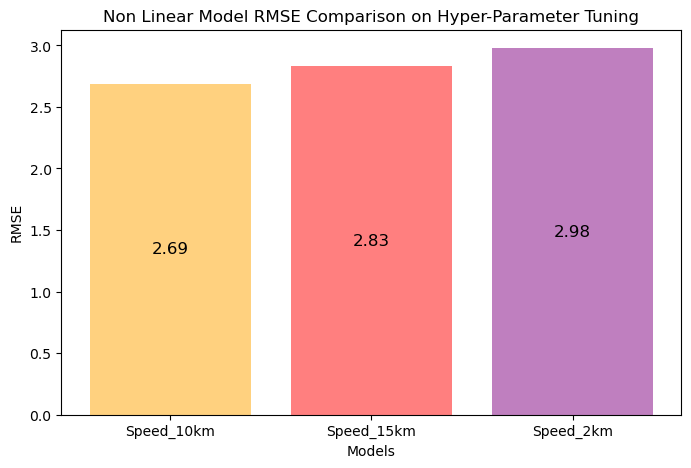

In [73]:
# Define the data2
models = ['Speed_10km', 'Speed_15km', 'Speed_2km']
RMSE = [2.69, 2.83, 2.98]

# Define colors for each bar
colors = ['orange', 'red', 'purple']

# Arrange data in ascending order
sorted_indices = np.argsort(RMSE)
models = [models[i] for i in sorted_indices]
RMSE = [RMSE[i] for i in sorted_indices]

# Create x-positions for the groups of bars
x_positions = np.arange(len(models))

# Plot the bar chart with bars arranged in ascending order
plt.figure(figsize=(8, 5))
bar1 = plt.bar(x_positions, RMSE, label='RMSE', alpha=0.5, color = colors)

# Add RMSE values as labels inside each bar
def add_rmse_labels(bars, values):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{value:.2f}',
                 ha='center', va='center', color='black', fontsize=12)

add_rmse_labels(bar1, RMSE)

# Title the plot and labels
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Non Linear Model RMSE Comparison on Hyper-Parameter Tuning')
plt.xticks(x_positions, models)  # Set x-axis tick positions and labels
plt.show()